In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

%matplotlib inline

In [2]:
col_names = ["Time (min)", "DOC", "Epoxide (mol/kg)", "Primary Amine (mol/kg)", 
             "Secondary Amine (mol/kg)", "Tertiary Amine (mol/kg)", "Temperature (C)"]

sheets = pd.read_excel("exp_data/DGEBA_NIR_Concentrations.xlsx", sheet_name=None, skiprows=[0,1], header=None, names=col_names)


/home/mikehenry/miniconda3/envs/epoxpy_env/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


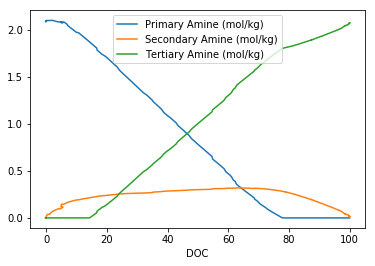

In [3]:
first_sheet = sheets["5C to 180C"]
#first_sheet = first_sheet.dropna()
first_sheet = first_sheet.convert_objects(convert_numeric=True).dropna()
first_sheet.plot(x="DOC", y=["Primary Amine (mol/kg)","Secondary Amine (mol/kg)", "Tertiary Amine (mol/kg)"])

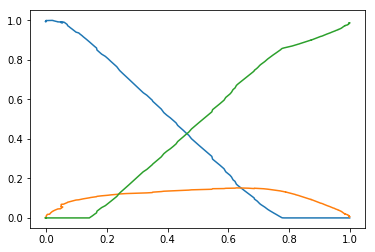

In [4]:
scale_factor = first_sheet["Primary Amine (mol/kg)"].max()
doc = np.asanyarray(first_sheet["DOC"])/100
pa = np.asanyarray(first_sheet["Primary Amine (mol/kg)"]/scale_factor)
sa = np.asanyarray(first_sheet["Secondary Amine (mol/kg)"]/scale_factor)
ta = np.asanyarray(first_sheet["Tertiary Amine (mol/kg)"]/scale_factor)


plt.plot(doc, pa)
plt.plot(doc, sa)
plt.plot(doc, ta)

/home/mikehenry/miniconda3/envs/epoxpy_env/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


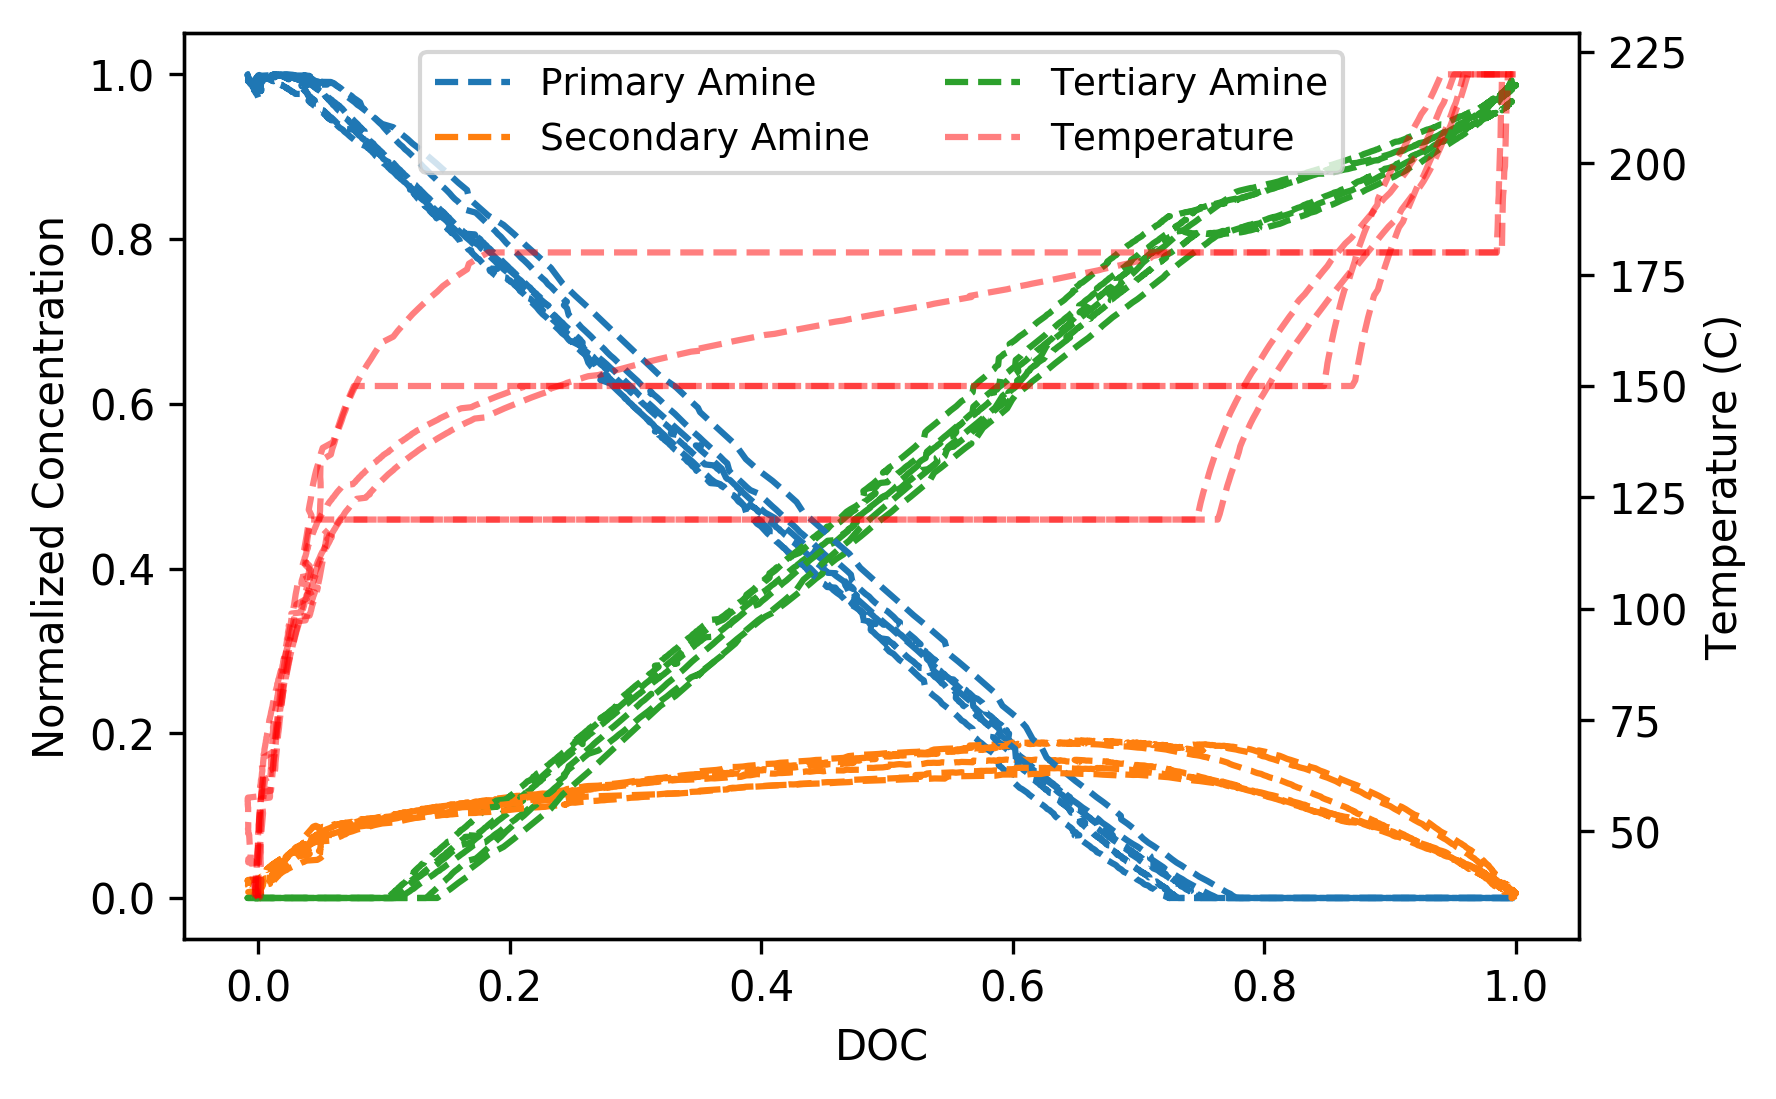

In [5]:
fig,ax1 = plt.subplots(dpi=300)
ax2 = ax1.twinx()
for df in sheets.values():
    df = df.convert_objects(convert_numeric=True).dropna()
    scale_factor = df["Primary Amine (mol/kg)"].max()
    doc = np.asanyarray(df["DOC"], dtype="float64")/100
    pa = np.asanyarray(df["Primary Amine (mol/kg)"]/scale_factor)
    sa = np.asanyarray(df["Secondary Amine (mol/kg)"]/scale_factor)
    ta = np.asanyarray(df["Tertiary Amine (mol/kg)"]/scale_factor)
    temp = np.asanyarray(df["Temperature (C)"])
    ln1 = ax1.plot(doc, pa, color='#1f77b4', linestyle='--', label="Primary Amine")
    ln2 = ax1.plot(doc, sa, color='#ff7f0e', linestyle='--', label="Secondary Amine")
    ln3 = ax1.plot(doc, ta, color='#2ca02c', linestyle='--', label="Tertiary Amine")
    ln4 = ax2.plot(doc, temp, color='red', linestyle='--', label="Temperature", alpha=0.5)

# Remove dups in legend
#handles, labels = plt.gca().get_legend_handles_labels()
#print(labels)
#by_label = OrderedDict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys())
#ax1.legend()
#ax2.legend()
lns = ln1+ln2+ln3+ln4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="upper center", ncol=2, fontsize=9)

ax1.set_xlabel("DOC")
ax1.set_ylabel("Normalized Concentration")
ax2.set_ylabel("Temperature (C)")


plt.show()

# TGDDM & 44DDS

In [10]:
file_path = "exp_data/Mike_Edits_Janisse_T44_NIR_Concentrations.xlsx"

col_names = ["timeA", "DOC", "timeB", "Epoxy", "Primary", "Secondary"]

sheets = pd.read_excel(file_path, sheet_name=None, skiprows=[0,1], header=None)

In [25]:
first_sheet = sheets["Sheet6"]
first_sheet = first_sheet.convert_objects(convert_numeric=True).dropna()
scale_factor = first_sheet[4].max()
print(first_sheet)
print(scale_factor)

      0         1    2        3        4        5
0    14   0.24233   14  5.94840  2.92610  0.05533
1    30   2.98230   30  5.78502  2.92982  0.15064
2    46   3.90585   46  5.72995  2.92357  0.24021
3    60   7.96901   60  5.48767  2.90078  0.32677
4    74   8.66565   74  5.44613  2.81748  0.39961
5    90   5.80695   90  5.61659  2.61557  0.46918
6    96   7.56568   96  5.51172  2.43438  0.49079
7   102   9.23267  102  5.41232  2.25335  0.52530
8   108  13.76875  108  5.14184  1.96149  0.55979
9   114  21.63361  114  4.67287  1.53604  0.59281
10  120  33.66595  120  3.95540  0.97474  0.60883
11  126  49.12852  126  3.03339  0.40733  0.57415
12  132  63.80908  132  2.15801  0.07428  0.48834
13  138  75.23550  138  1.47667  0.00000  0.37820
14  144  81.56234  144  1.09941  0.00000  0.31444
15  150  85.35013  150  0.87355  0.00000  0.28222
16  156  87.42984  156  0.74954  0.00000  0.27405
17  162  88.62708  162  0.67815  0.00000  0.26961
18  168  89.67356  168  0.61575  0.00000  0.26428


/home/mikehenry/miniconda3/envs/epoxpy_env/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


/home/mikehenry/miniconda3/envs/epoxpy_env/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


/home/mikehenry/miniconda3/envs/epoxpy_env/lib/python3.5/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


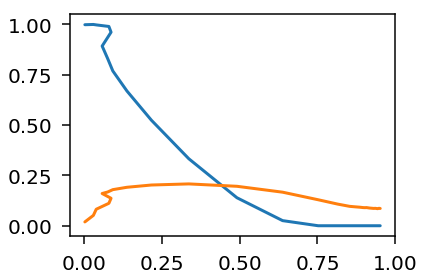

In [33]:
file_path = "exp_data/Mike_Edits_Janisse_T44_NIR_Concentrations.xlsx"
sheets = pd.read_excel(file_path, sheet_name=None, skiprows=[0,1], header=None)
first_sheet = sheets["Sheet6"]
first_sheet = first_sheet.convert_objects(convert_numeric=True).dropna()
doc = np.asanyarray(first_sheet[1])/100
pa = np.asanyarray(first_sheet[4]/scale_factor)
sa = np.asanyarray(first_sheet[5]/scale_factor)
plt.plot(doc, pa)
plt.plot(doc, sa)

/home/mikehenry/miniconda3/envs/epoxpy_env/lib/python3.5/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


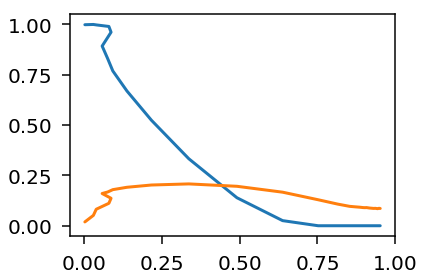

In [31]:
plt.plot(doc, pa)
plt.plot(doc, sa)